<a href="https://colab.research.google.com/github/aknsntn/math_ml/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data.sampler import  SubsetRandomSampler
import statistics

Скачаем обучающую и контрольную выборки.

In [ ]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=T)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=T)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
len(trainset)

60000

In [ ]:
len(testset)

10000

Получается, в `train` мы имеем 60000 картинок, в `test` 10000.

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


<BarContainer object of 10 artists>

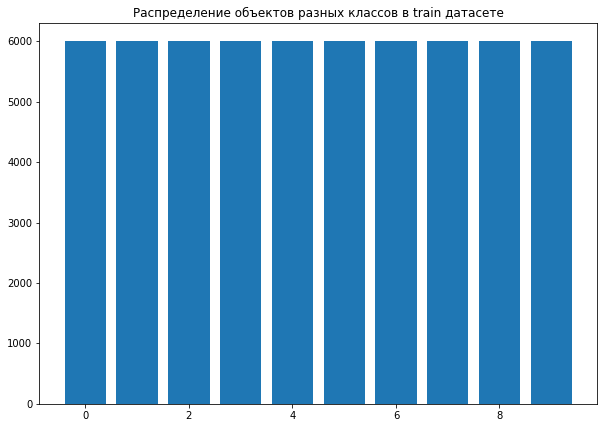

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Распределение объектов разных классов в train датасете")
plt.bar(*trainset.train_labels.unique(return_counts=True))

В `train` объекты распределены равномерно.

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


<BarContainer object of 10 artists>

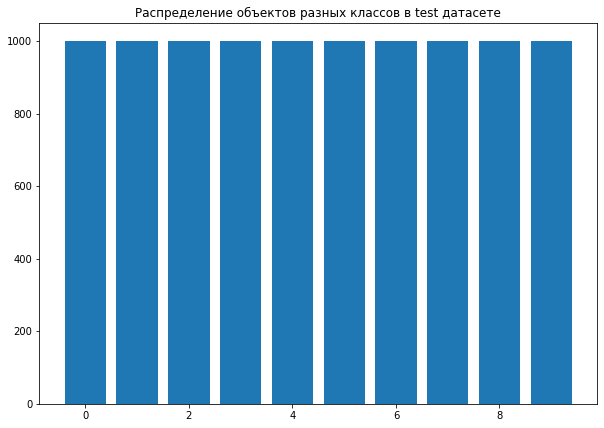

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Распределение объектов разных классов в test датасете")
plt.bar(*testset.test_labels.unique(return_counts=True))

В `test` тоже равномерное распределение.

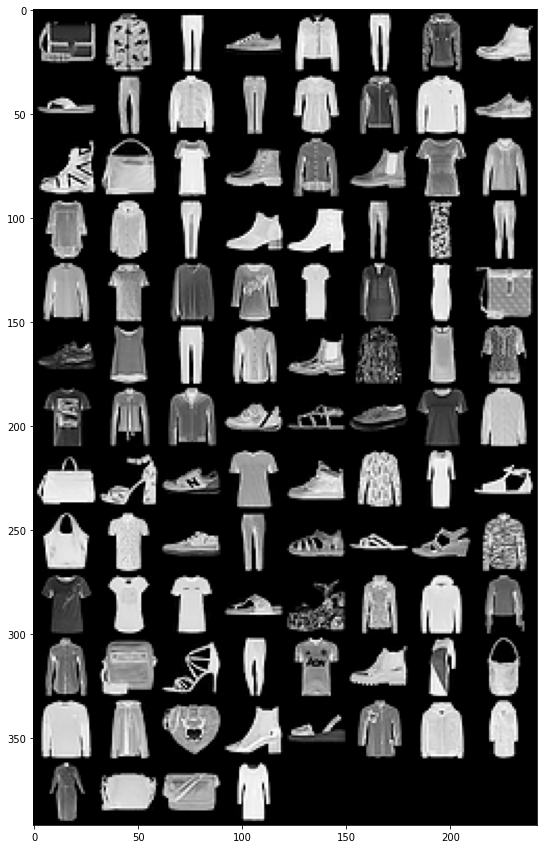

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,15))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from torch.autograd import Variable

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# MLP

In [ ]:
model1 = nn.Sequential(
      nn.Linear(784,784//2),
      nn.BatchNorm1d(784//2),
    nn.ELU(),
    nn.Linear(784//2,784//4),
    nn.BatchNorm1d(784//4),
    nn.ELU(),
    nn.Linear(784//4,784//8),
    nn.ELU(),
    nn.Linear(784//8,len(classes)),
    nn.Softmax(),
)

In [ ]:
model1.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)
print(model1)

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): BatchNorm1d(392, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ELU(alpha=1.0)
  (3): Linear(in_features=392, out_features=196, bias=True)
  (4): BatchNorm1d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=196, out_features=98, bias=True)
  (7): ELU(alpha=1.0)
  (8): Linear(in_features=98, out_features=10, bias=True)
  (9): Softmax(dim=None)
)


In [ ]:
num_epochs = 60


count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []
loss_epoch = []
acc_epoch = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in trainloader:
        # Transfering images and labels to GPU if available
        images, labels = images.reshape(images.shape[0],-1).to(device), labels.to(device)

        train = Variable(images)
        labels = Variable(labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        # Forward pass 
        outputs = model1(train)
        loss = error(outputs, labels)
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
        # Testing the model
    
        if not (count % 100):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in testloader:
                images, labels = images.reshape(images.shape[0],-1).to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model1(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)

            
            accuracy = correct * 100 / total
            loss_list.append(loss.cpu().data)
            iteration_list.append(count)
            accuracy_list.append(accuracy.cpu())

        if not (count % 5000):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))
            
    loss_epoch.append(torch.mean(torch.stack(loss_list)))
    acc_epoch.append(torch.mean(torch.stack(accuracy_list)))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Iteration: 5000, Loss: 1.5712007284164429, Accuracy: 85.90999603271484%
Iteration: 10000, Loss: 1.6245390176773071, Accuracy: 86.55999755859375%
Iteration: 15000, Loss: 1.5568902492523193, Accuracy: 87.06999969482422%
Iteration: 20000, Loss: 1.5902117490768433, Accuracy: 86.5199966430664%
Iteration: 25000, Loss: 1.5530543327331543, Accuracy: 87.38999938964844%
Iteration: 30000, Loss: 1.5671566724777222, Accuracy: 87.69999694824219%
Iteration: 35000, Loss: 1.5607094764709473, Accuracy: 87.5%


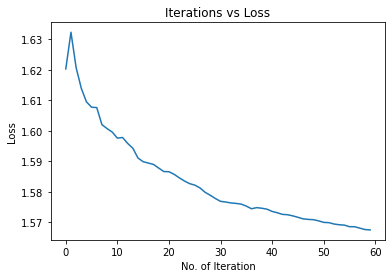

In [ ]:
plt.plot(loss_epoch)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

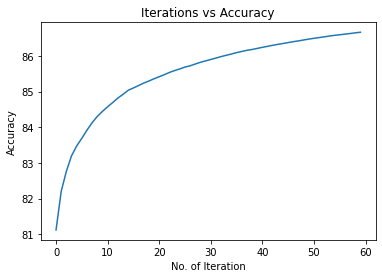

In [ ]:
plt.plot(acc_epoch)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.reshape(images.shape[0],-1).to(device), labels.to(device)

        outputs = model1(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 87 %


# CNN

In [ ]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [ ]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [ ]:
a = next(iter(trainloader))
a[0].size()

torch.Size([100, 1, 28, 28])

In [ ]:
num_epochs = 15
count = 0

loss_list = []
iteration_list = []
accuracy_list = []
loss_epoch = []
acc_epoch = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in trainloader:

        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)
        loss = error(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
    
        count += 1

    
        if not (count % 100):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)

            
            accuracy = correct * 100 / total
            loss_list.append(loss.cpu().data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 1000):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

    loss_epoch.append(torch.mean(torch.stack(loss_list)))
    acc_epoch.append(torch.mean(torch.stack(accuracy_list)))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 1000, Loss: 0.21865731477737427, Accuracy: 86.3499984741211%
Iteration: 2000, Loss: 0.4254940152168274, Accuracy: 89.57999420166016%
Iteration: 3000, Loss: 0.14616800844669342, Accuracy: 89.97000122070312%
Iteration: 4000, Loss: 0.1809537708759308, Accuracy: 90.79999542236328%
Iteration: 5000, Loss: 0.12464641779661179, Accuracy: 90.44999694824219%
Iteration: 6000, Loss: 0.31187060475349426, Accuracy: 91.15999603271484%
Iteration: 7000, Loss: 0.1262603998184204, Accuracy: 91.22000122070312%
Iteration: 8000, Loss: 0.23316867649555206, Accuracy: 91.2699966430664%
Iteration: 9000, Loss: 0.09419908374547958, Accuracy: 90.72999572753906%


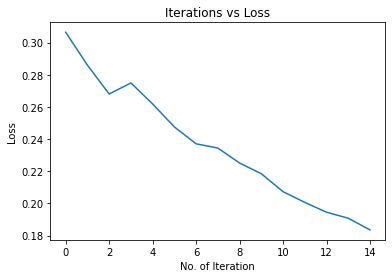

In [ ]:
plt.plot(loss_epoch)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [ ]:
acc = [acc_epoch[i].cpu() for i in range(len(acc_epoch))]

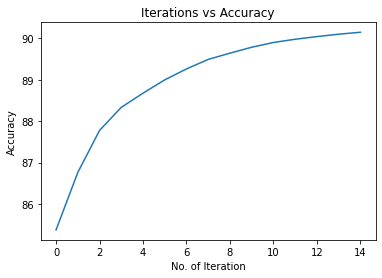

In [ ]:
plt.plot(acc)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 90 %


# Выводы

Графики `loss` и `accuracy` в целом говорят о корректном процессе обучения. После 60 эпохи `accuracy` MLP составила 87%, а `accuracy` CNN была в районе 90-91 к 15 эпохе.